In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# I cleaned my student file

In [2]:
dat = pd.read_csv('students_cleaned_numpy.csv')
dat.shape
df = dat.head(150)

df['Gender'] = df['Gender'].str.strip().replace({
    'F':'FEMALE',
    'M':'MALE', 
    'Female':'FEMALE', 
    'male': 'MALE', 
    'Male':'MALE',
    'female':'FEMALE'})

C:\Users\tseun\AppData\Local\Temp\ipykernel_34016\3767952005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.strip().replace({


In [3]:
df['Gender'].value_counts()

Gender
FEMALE    74
MALE      64
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

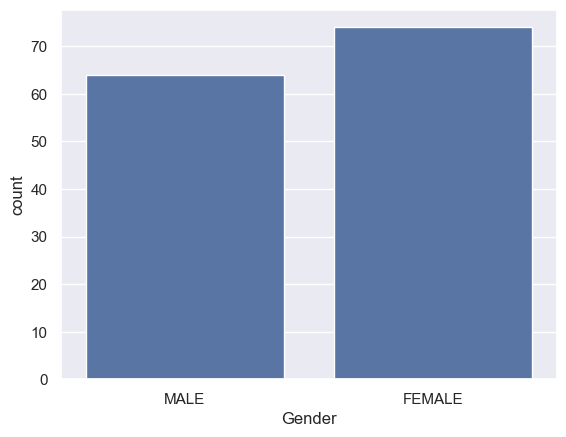

In [4]:

sns.set_theme(style="darkgrid")

sns.countplot(x='Gender', data=df)

In [5]:
df = df.copy()          # To avoid SettingWithCopyWarning

for col in ['MathScore', 'AttendancePct', 'EnglishScore']:
    df[col] = df[col].astype(int)

In [6]:
df['Country'] = df['Country'].str.strip().replace({
    'nigeria':'Nigeria'})

df['ClassLevel'] = df['ClassLevel'].str.strip().replace({
    'ss1':'SS1',
    'SS-3':'SS3',
    'Jss2':'JSS2'})

In [7]:
df['ClassLevel'].value_counts()

ClassLevel
SS3     32
JSS2    27
JSS3    26
SS1     20
JSS1    18
SS2     18
Name: count, dtype: int64

# using countplot()

<Axes: xlabel='Country', ylabel='count'>

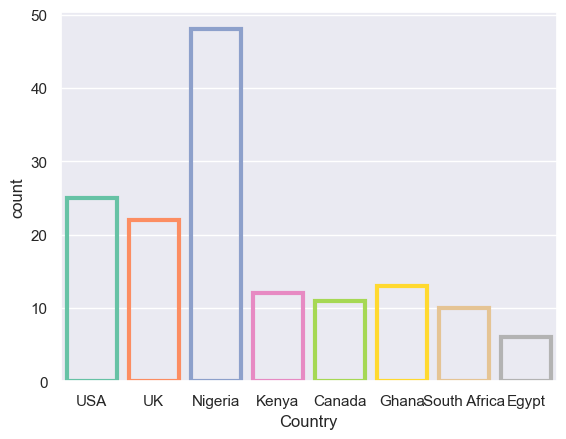

In [8]:
sns.countplot(x='Country', data=df, facecolor=(0,0,0,0), edgecolor=sns.color_palette("Set2", 8), linewidth=3)   # to view it with outlined bars, no fill color, edge color from palette
# sns.color_palette("Set2", 8) # to view the colors in the palette

<Axes: xlabel='Country', ylabel='count'>

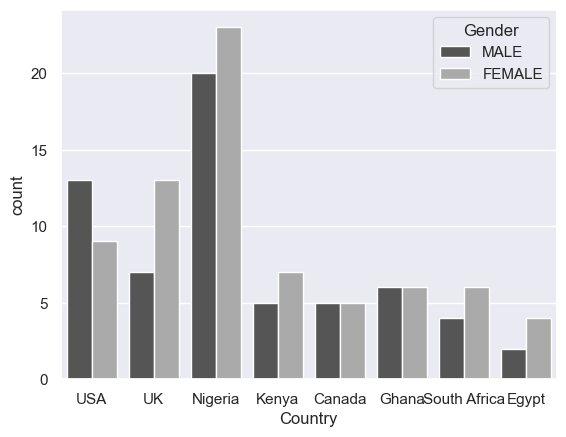

In [9]:
plt.Figure(figsize=(15,6))

sns.countplot(x='Country', hue='Gender', palette='gist_gray', data=df)       # hue for grouping

<Axes: xlabel='count', ylabel='Country'>

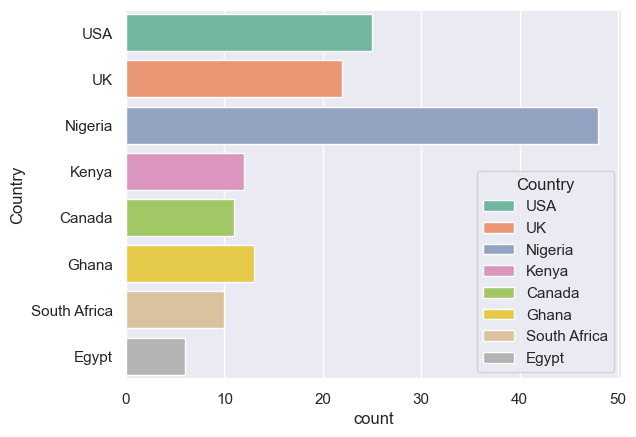

In [10]:
sns.countplot(y='Country', data=df, hue='Country', palette='Set2')     # to view it in horizontal bars

# BARPLOT WITH OUTLINED BARS

<Axes: xlabel='Country', ylabel='MathScore'>

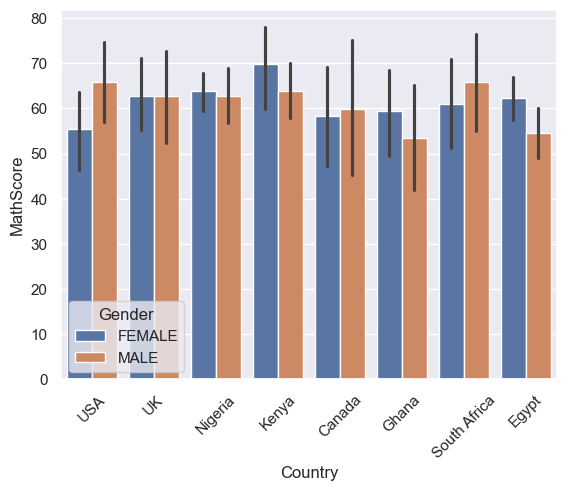

In [11]:
# BARPLOT WITH OUTLINED BARS
# print(sns.get_dataset_names())    # to view available datasets    
plt.Figure(figsize=(12,6))
plt.xticks(rotation=45)         # rotate x-axis labels for better visibility

sns.barplot(x='Country', y='MathScore', data=df, hue='Gender', hue_order=['FEMALE', 'MALE'])   # outlined bars for barplot

Plot bar in a given order

<Axes: xlabel='Country', ylabel='MathScore'>

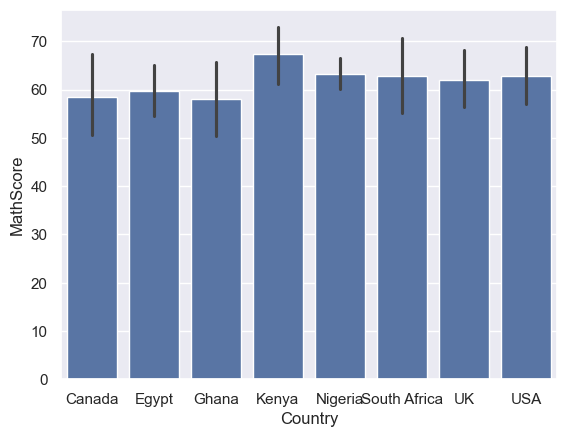

In [12]:
df['Country'].sort_values().unique()      # to view unique country names in sorted order


sns.barplot(x='Country', y='MathScore', data=df, order=['Canada', 'Egypt', 'Ghana', 'Kenya', 'Nigeria', 'South Africa',
       'UK', 'USA'])   # horizontal barplot with outlined bars

horizontal barplot

<Axes: xlabel='MathScore', ylabel='Country'>

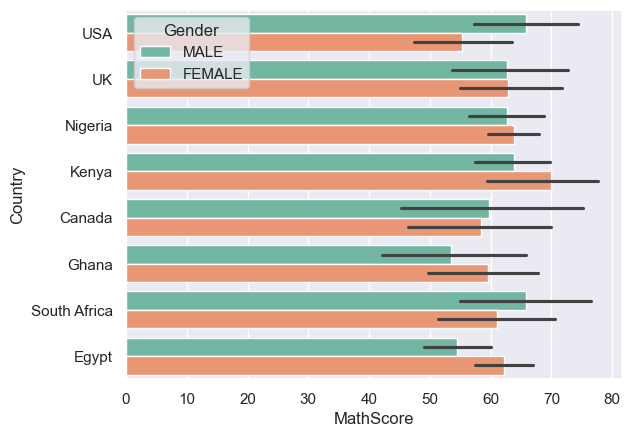

In [13]:
sns.barplot(y='Country', x='MathScore', data=df, hue='Gender', palette='Set2' )   # horizontal barplot with outlined bars

Add CAP on the error bar


<Axes: xlabel='Country', ylabel='MathScore'>

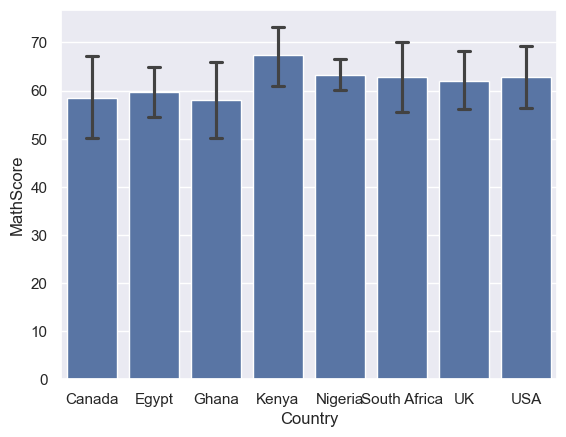

In [14]:
sns.barplot(x='Country', y='MathScore', data=df, order=['Canada', 'Egypt', 'Ghana', 'Kenya', 'Nigeria', 'South Africa',
       'UK', 'USA'], capsize=0.2)

TO REMOVE THE ERROR BAR

<Axes: xlabel='Country', ylabel='MathScore'>

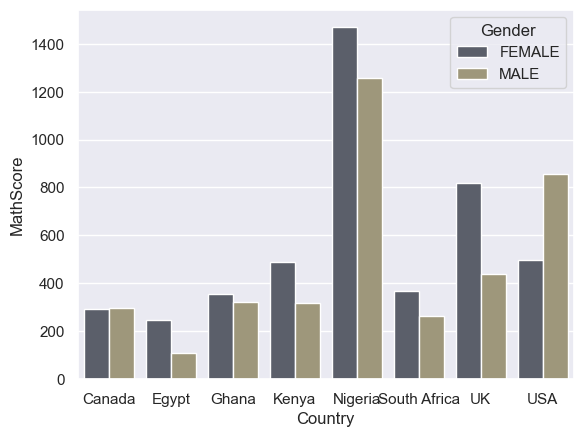

In [15]:
sns.barplot(x='Country', y='MathScore', data=df,hue='Gender', hue_order=['FEMALE', 'MALE'], order=['Canada', 'Egypt', 'Ghana', 'Kenya', 'Nigeria', 'South Africa',
       'UK', 'USA'], capsize=0.2, errorbar=None, palette='cividis', saturation=0.7, estimator=sum)


# BOX PLOT

<Axes: ylabel='YearsCode'>

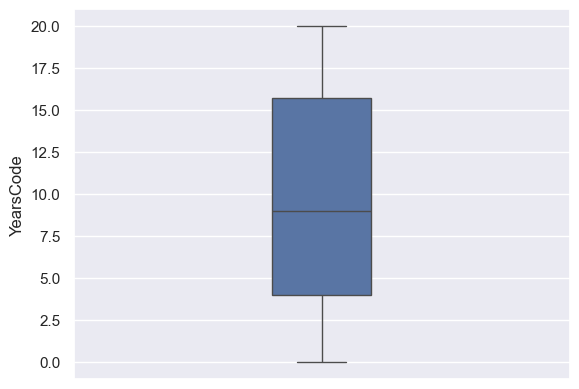

In [16]:
sns.boxplot(y='YearsCode', data=df, width=0.2)




Text(0.5, 1.02, 'MathScore by ClassLevel')

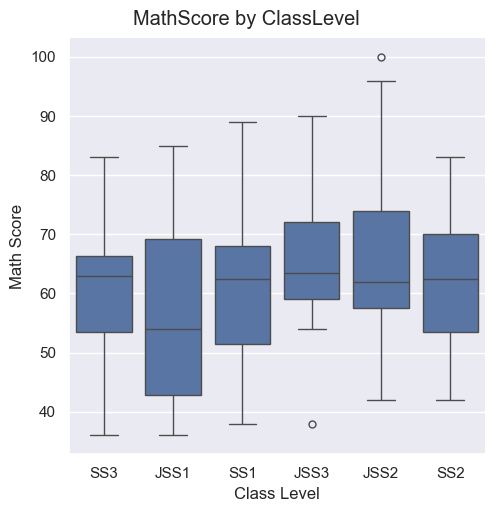

In [17]:
g = sns.catplot(data=df, x="ClassLevel", y="MathScore", kind="box")
g.set_axis_labels("Class Level", "Math Score")
g.fig.suptitle("MathScore by ClassLevel", y=1.02)

Basic box plot on one numeric variable by categorical 


<Axes: xlabel='ClassLevel', ylabel='YearsCode'>

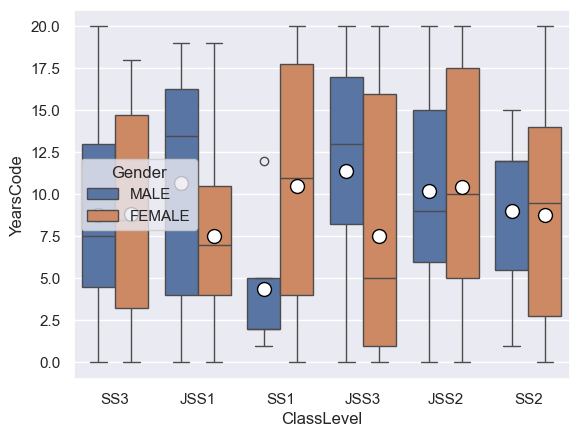

In [18]:
sns.boxplot(x='ClassLevel', y='YearsCode', data=df, hue='Gender', showmeans=True, meanprops={"marker":"o", 
                                                                                             "markerfacecolor":"white", 
                                                                                             "markeredgecolor":"black", 
                                                                                             "markersize":"10"})

In Horizontal

<Axes: xlabel='YearsCode', ylabel='ClassLevel'>

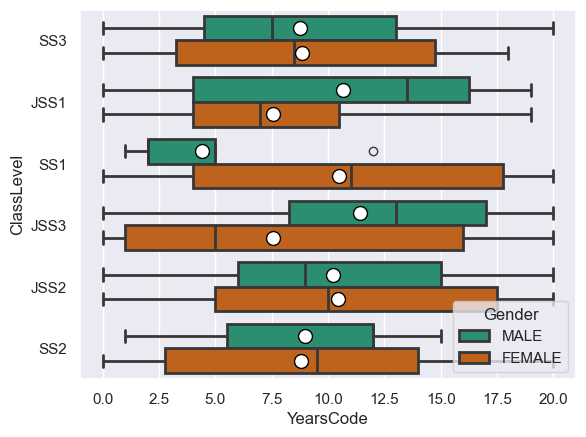

In [19]:
sns.boxplot(y='ClassLevel', x='YearsCode', data=df, hue='Gender', showmeans=True, meanprops={"marker":"o", 
                                                                                             "markerfacecolor":"white", 
                                                                                             "markeredgecolor":"black", 
                                                                                             "markersize":"10"},
                                                                                            palette='Dark2',
                                                                                            linewidth=2)

<Axes: >

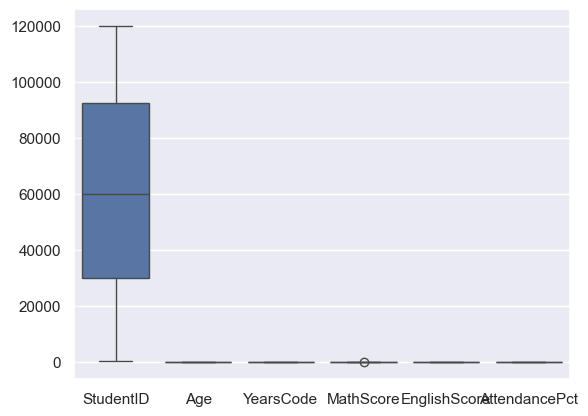

In [20]:
sns.boxplot(data=df)

# CREATING A VIOLINPLOT
is like a boxplot + distribution together: it shows the median/quartiles and also the shape (where values are concentrated).

<Axes: ylabel='EnglishScore'>

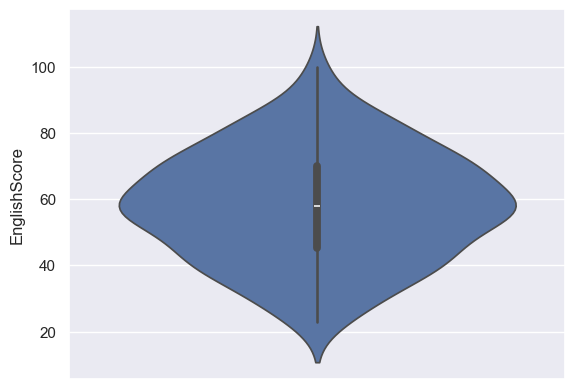

In [21]:
sns.violinplot(y='EnglishScore', data=df)

Violinplot on two categories and use split.. 
split=True only works well when Gender has two categories (e.g., M and F)

<Axes: xlabel='ClassLevel', ylabel='YearsCode'>

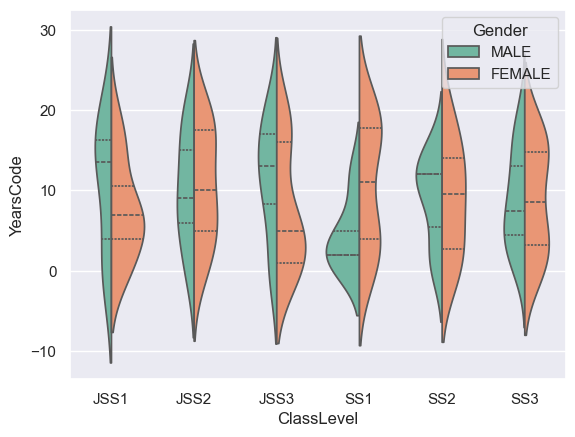

In [22]:
sns.violinplot(x='ClassLevel', y='YearsCode', 
               data=df, order=['JSS1', 'JSS2', 'JSS3', 'SS1', 'SS2', 'SS3'], 
               hue="Gender", 
               split=True, 
               palette='Set2',
               inner="quartile")



Text(0.5, 1.0, 'MathScore by ClassLevel (Quartiles)')

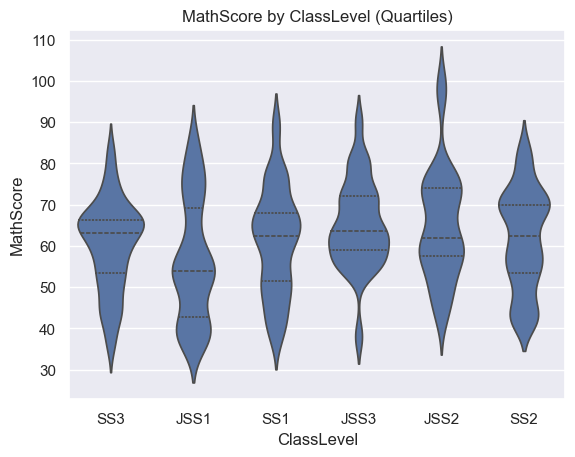

In [23]:
sns.violinplot(data=df, x="ClassLevel", y="MathScore", inner="quartile", bw_method=0.3)
plt.title("MathScore by ClassLevel (Quartiles)")

Draw line for each obser in violinplot

<Axes: xlabel='ClassLevel', ylabel='MathScore'>

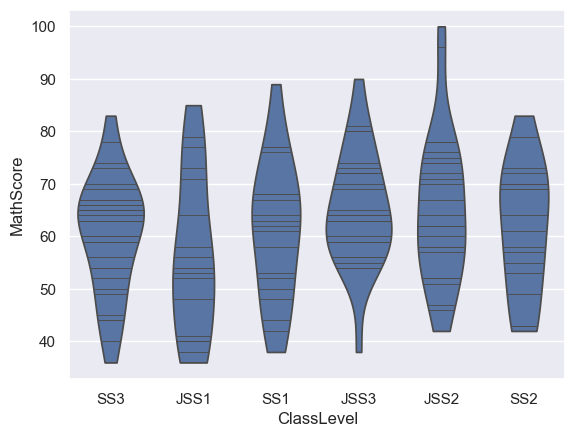

In [24]:
sns.violinplot(data=df, x="ClassLevel", y="MathScore", inner="stick", cut=0)
# each line rep each observation


# STRIP PLOT
 strip plot shows every data point (like a scatter plot) along categories. seeing spread + outliers..
THEY OVERLAP

<Axes: ylabel='MathScore'>

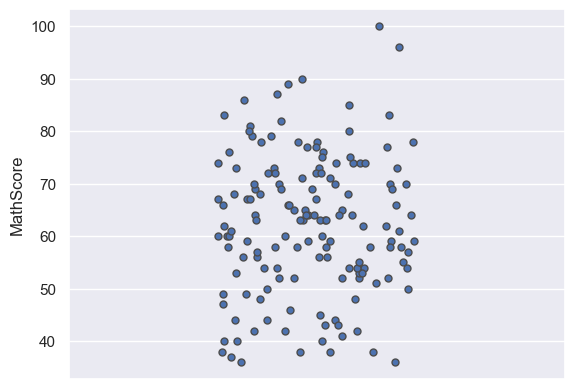

In [25]:
sns.stripplot(y='MathScore', data=df, jitter=0.2, linewidth=1)
# jitter to add some random noise to spread out the points, it removes overlap

<Axes: xlabel='ClassLevel', ylabel='MathScore'>

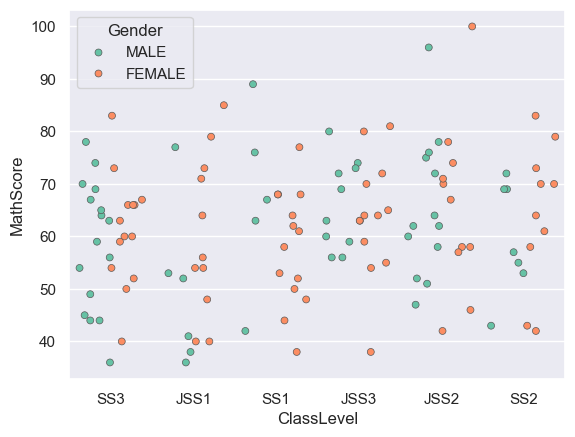

In [26]:
# strip plot shows every data point (like a scatter plot) along categories. seeing spread + outliers
# dodge=True to separate the points based on hue category, seeparate male n female

sns.stripplot(x='ClassLevel', y='MathScore', data=df, jitter=0.4, linewidth=0.5, hue='Gender', palette='Set2', dodge=True)



C:\Users\tseun\AppData\Local\Temp\ipykernel_34016\3970744563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='ClassLevel', y='MathScore', data=df, jitter=0.1, palette='cividis')


<Axes: xlabel='ClassLevel', ylabel='MathScore'>

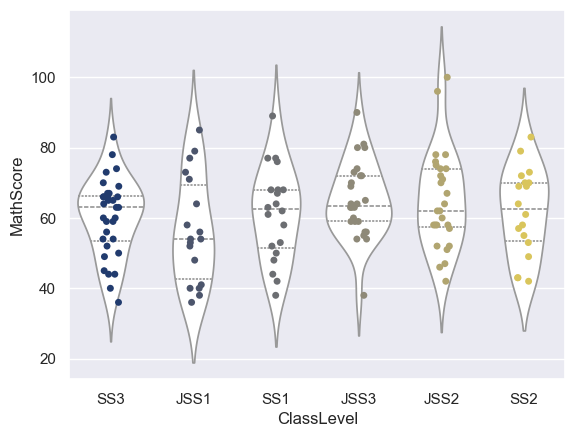

In [27]:
sns.stripplot(x='ClassLevel', y='MathScore', data=df, jitter=0.1, palette='cividis')
sns.violinplot(x='ClassLevel', y='MathScore', data=df, color='white', inner="quartile")

Text(0.5, 1.0, 'MathScore by ClassLevel (Box + Points)')

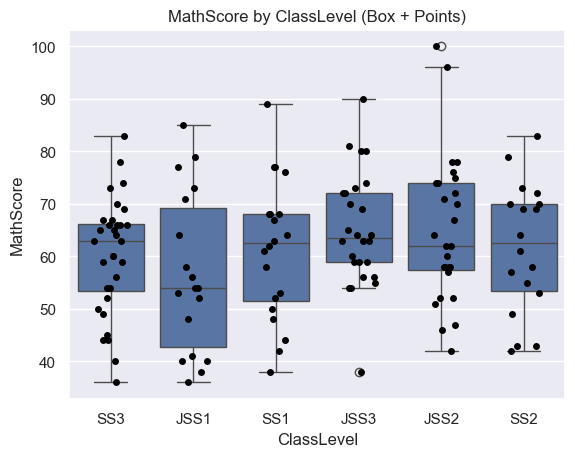

In [28]:
sns.boxplot(data=df, x='ClassLevel', y='MathScore')
sns.stripplot(data=df, x='ClassLevel', y='MathScore', color='black', jitter=0.2)
plt.title('MathScore by ClassLevel (Box + Points)')

<Axes: xlabel='ClassLevel', ylabel='MathScore'>

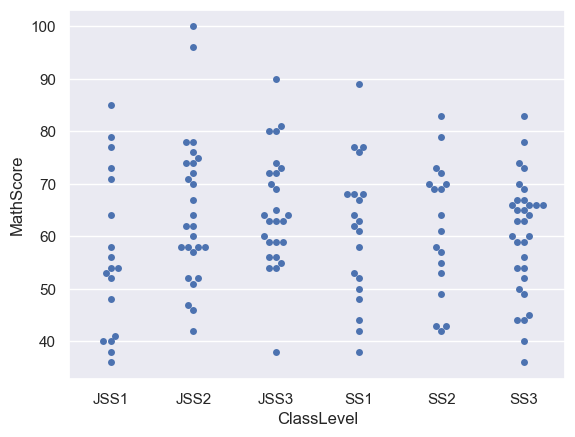

In [29]:
# Swarmplot arranges points so they don’t overlap (slower on big data
sns.swarmplot(data=df, x='ClassLevel', y='MathScore', order=['JSS1', 'JSS2', 'JSS3', 'SS1', 'SS2', 'SS3'])

# SWARMPLOT 
Swarmplot arranges points so they don’t overlap, NO OVERLAPPING

<Axes: ylabel='MathScore'>

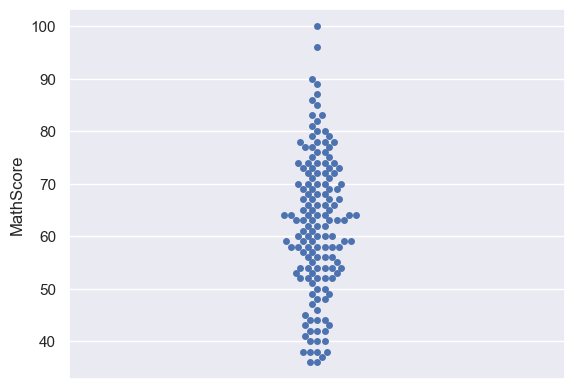

In [30]:
sns.swarmplot(data=df, y='MathScore')

<Axes: xlabel='ClassLevel', ylabel='MathScore'>

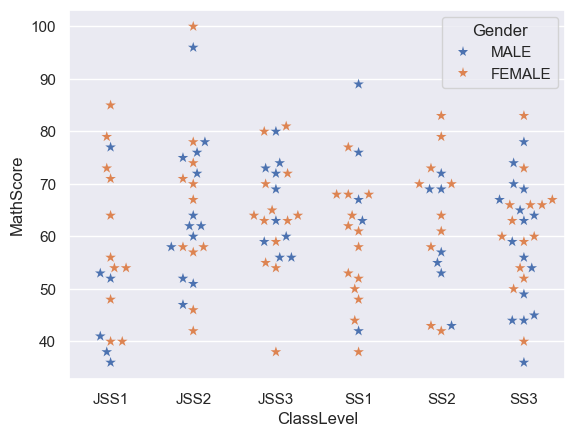

In [31]:
sns.swarmplot(data=df, x='ClassLevel',  y='MathScore', hue='Gender', marker='*', size=8, order=['JSS1', 'JSS2', 'JSS3', 'SS1', 'SS2', 'SS3'])

Text(0.5, 1.0, 'MathScore by ClassLevel (Box + Points)')

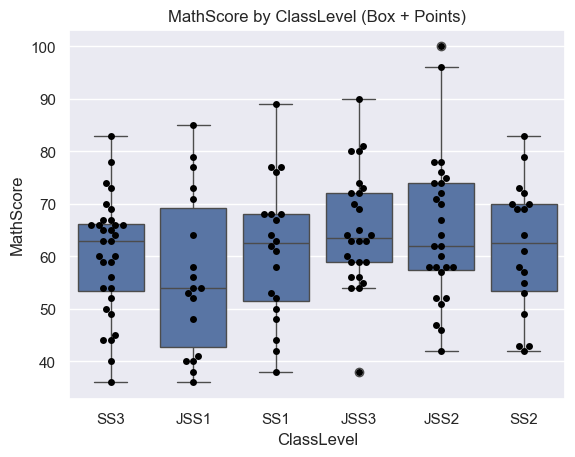

In [32]:
sns.boxplot(data=df, x='ClassLevel', y='MathScore')
sns.swarmplot(data=df, x='ClassLevel', y='MathScore', color='black')
plt.title('MathScore by ClassLevel (Box + Points)')

Text(0.5, 1.0, 'MathScore by ClassLevel (Box + Points)')

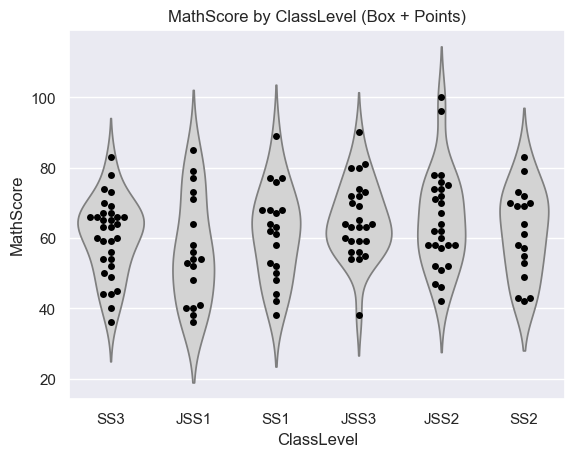

In [33]:
sns.violinplot(data=df, x='ClassLevel', y='MathScore', color='lightgray', inner=None)
sns.swarmplot(data=df, x='ClassLevel', y='MathScore', color='black')
plt.title('MathScore by ClassLevel (Box + Points)')

# CATEGORICAL PLOT - - CAT PLOT

catplot is like a “master function” for categorical plots. 
You choose a kind ("bar", "box", "violin", "strip", "swarm", "point", "count")
Seaborn automatically creates a nice figure
You can split by hue (color groups) and by col/row 

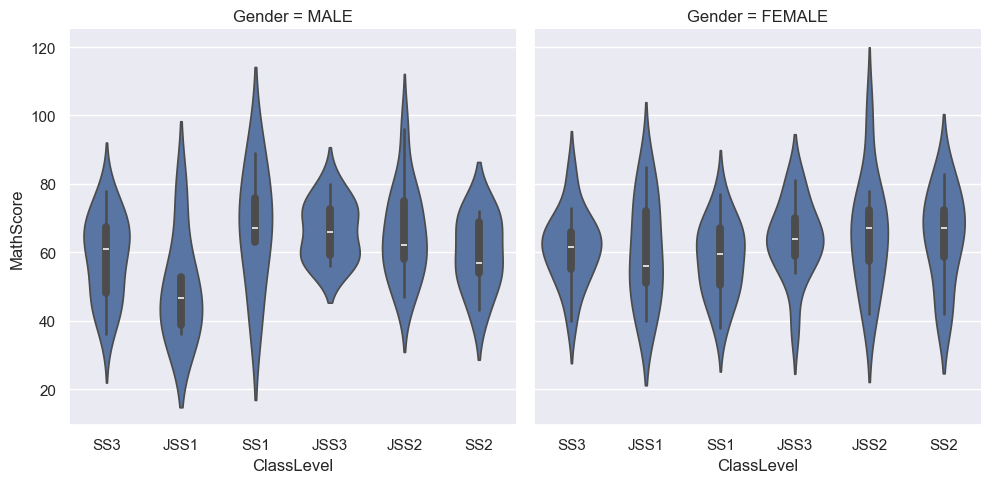

In [34]:
#  By default, the catplot() function creates a strip plot when no kind parameter is specified., strip like
sns.catplot(data=df, x='ClassLevel', y='MathScore', kind='violin', col='Gender')

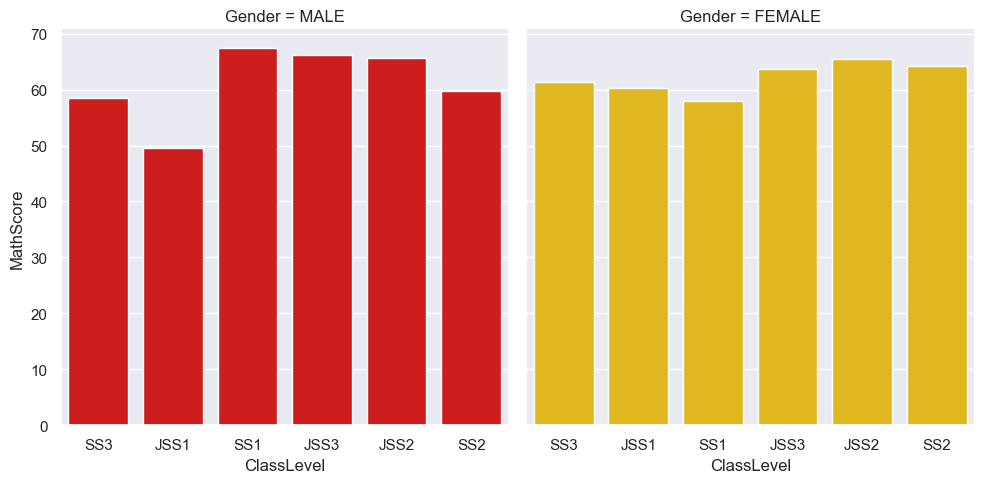

In [35]:
sns.catplot(data=df, x='ClassLevel', y='MathScore', kind='bar', col='Gender',hue='Gender', palette='hot', errorbar=None, legend=False)

Text(0.5, 1.02, 'MathScore by ClassLevel')

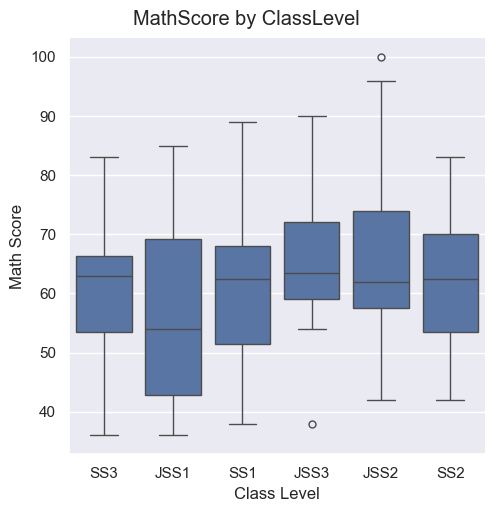

In [36]:
g = sns.catplot(data=df, x="ClassLevel", y="MathScore", kind="box")
g.set_axis_labels("Class Level", "Math Score")
g.fig.suptitle("MathScore by ClassLevel", y=1.02)


In [37]:
df.head()

,StudentID,Name,Gender,Age,ClassLevel,Country,YearsCode,MathScore,EnglishScore,AttendancePct,Date,Email,Phone
0,115082,Fatima Yusuf,NaN,16.0,SS3,USA,7.0,65,54,85,2021-05-05 06:00:00,fatima.yusuf1654@school.edu,07050937730
1,86795,Ada Ogundare,MALE,17.0,JSS1,UK,19.0,77,72,76,22/08/2021 03:00 AM,ada.ogundare1907@school.edu,08484889590
2,49227,Efe Olatunji,FEMALE,11.0,SS1,Nigeria,18.0,58,34,75,2021-07-08 03:00:00,efe.olatunji2306@school.edu,09828475957
3,16514,David Okafor,FEMALE,17.0,JSS1,Kenya,6.0,73,36,73,not_a_date,david.okafor8059@mail.com,07264516767
4,119749,Bola Nwosu,FEMALE,11.0,SS1,Nigeria,19.0,64,55,91,2020-10-15 14:00:00,bola.nwosu3192@example.com,07726106960


In [38]:
df.to_csv('students_cleaned_150.csv', index=False)